#Libraries and Data

In [35]:
#import libraries
import numpy as np
import pandas as pd
import itertools
from prophet import Prophet
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [38]:
#load the datast
#[OLECTRA,"LT","CONCOR","ELGIEQUIP","IOC","BEL","TATAELXSI","^NSEI"]
#["RELI","HDFCBANK.NS","TATAMOTORS.NS","SBIN.NS","TCS.NS","TITAN.NS","SUNPHARMA.BO","TECHM.NS", "ASIANPAINT.NS","TATACONSUM.NS"]

stock_name = "TATACONSUM.NS"
data = yfinance.download (tickers = "{}".format(stock_name),start="2000-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

#data = pd.read_csv("./stock_historical_data/{}.csv".format(stock_name))
#data.set_index("Date", inplace=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-08-02,855.000000,855.000000,838.200012,843.049988,1604731
2023-08-03,840.000000,841.650024,832.549988,835.400024,1375222
2023-08-04,837.049988,841.599976,832.299988,834.799988,887582
2023-08-07,836.950012,840.650024,829.500000,837.799988,1106208
2023-08-08,839.000000,853.099976,833.750000,847.450012,1252102


In [53]:
data["Month"] = data.index.month_name()
data["year"] = data.index.year


<Axes: xlabel='Month', ylabel='Close'>

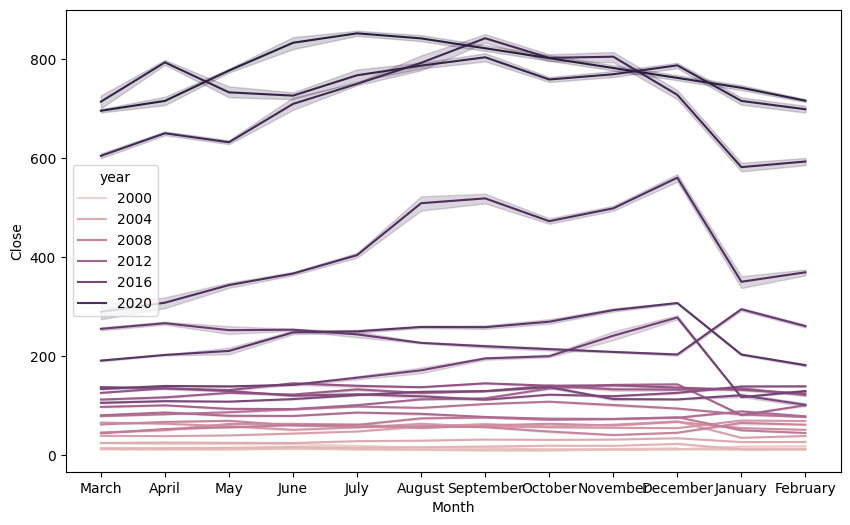

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Close', hue='year', data=data)


#Data preparation

In [3]:
#transform the date variable
data["Date"] = pd.to_datetime(data.index)
#data.Date

In [4]:
#renaming variables
data = data.rename(columns = {'Close': 'y',
                     'Date': 'ds'})
data.tail(10)
data

,Open,High,Low,y,Volume,ds
Date,,,,,,
2000-03-06,25.774561,26.749486,25.348031,26.112738,840840,2000-03-06
2000-03-07,25.719718,26.201088,24.037975,25.183512,1565080,2000-03-07
2000-03-08,25.591762,26.194998,24.440133,25.710581,671100,2000-03-08
2000-03-09,26.079223,27.115080,24.129374,25.381542,857240,2000-03-09
2000-03-10,25.043366,25.439430,23.459115,23.833853,905660,2000-03-10
...,...,...,...,...,...,...
2023-08-02,855.000000,855.000000,838.200012,843.049988,1604731,2023-08-02
2023-08-03,840.000000,841.650024,832.549988,835.400024,1375222,2023-08-03
2023-08-04,837.049988,841.599976,832.299988,834.799988,887582,2023-08-04


#Holidays

In [5]:
#Thanksgiving
#thanksgiving_dates = df[df.Thanksgiving == 1].ds
#thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
 #                      'ds': pd.to_datetime(thanksgiving_dates),
  #                     'lower_window': -5,
   #                    'upper_window': 2})
#thanksgiving.head(2)

In [6]:
#combining holidays
#holidays = pd.concat([easter, thanksgiving])
#holidays

In [7]:
#create training and test set
test_days = 360 * 2
training_set = data.iloc[:-test_days,:]
test_set = data.iloc[-test_days:,:]

In [8]:
training_set.tail(1)
#test_set.tail(1)

,Open,High,Low,y,Volume,ds
Date,,,,,,
2020-09-14,538.507779,541.629575,530.118007,533.142212,2809233,2020-09-14


#Prophet

In [9]:
m = Prophet(
            #holidays = holidays,
            #seasonality_mode = 'multiplicative',
           # seasonality_prior_scale = 20,
            #changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('Christmas')
m.fit(training_set)


08:30:29 - cmdstanpy - INFO - Chain [1] start processing
08:30:32 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#create future df
#future = m.make_future_dataframe(periods = test_days,
                               #  freq = "B")



In [11]:
#future = pd.concat([future], axis = 1)
#future_full = pd.concat([future_full], axis = 1)

 

In [12]:
#forecast
forecast = m.predict(data)
forecast.tail()
#forecast full data


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5844,2023-08-02,532.280250,485.557950,597.041547,485.826713,579.573797,7.395174,7.395174,7.395174,5.174070,5.174070,5.174070,2.221104,2.221104,2.221104,0.0,0.0,0.0,539.675424
5845,2023-08-03,532.447130,481.859438,597.665842,485.940058,579.866116,7.851636,7.851636,7.851636,5.320098,5.320098,5.320098,2.531538,2.531538,2.531538,0.0,0.0,0.0,540.298766
5846,2023-08-04,532.614011,486.988646,600.215224,486.056291,580.158435,7.917686,7.917686,7.917686,5.055317,5.055317,5.055317,2.862369,2.862369,2.862369,0.0,0.0,0.0,540.531697
5847,2023-08-07,533.114652,487.584313,598.409725,486.506284,580.778635,9.170427,9.170427,9.170427,5.223895,5.223895,5.223895,3.946532,3.946532,3.946532,0.0,0.0,0.0,542.285079
5848,2023-08-08,533.281532,486.666782,594.607150,486.622517,581.030601,9.189349,9.189349,9.189349,4.862053,4.862053,4.862053,4.327296,4.327296,4.327296,0.0,0.0,0.0,542.470881


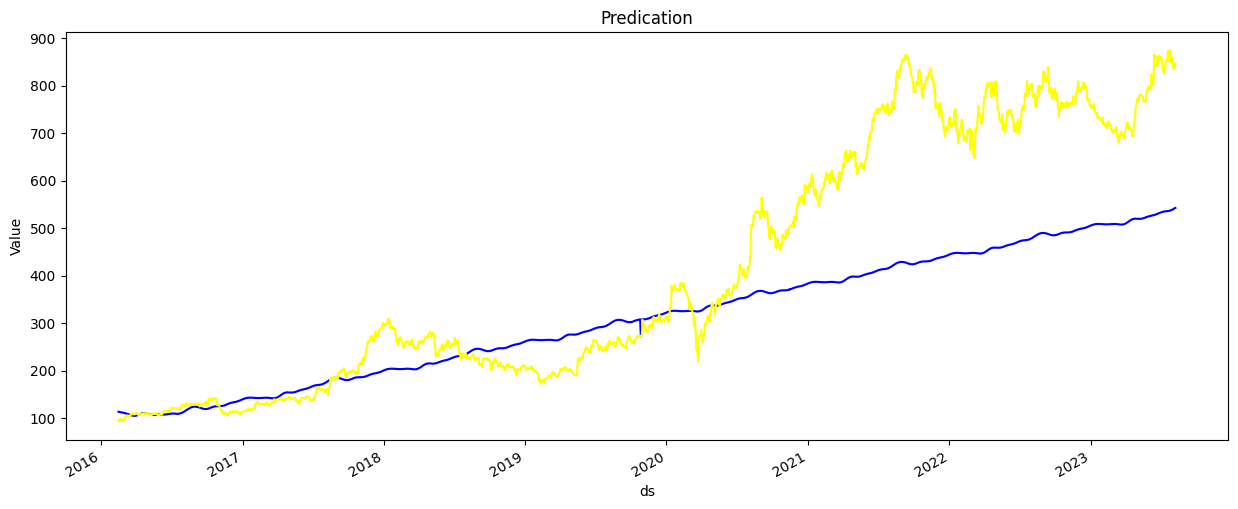

In [13]:
for_df = forecast.copy()
for_df["ds"] = pd.to_datetime(for_df["ds"])
for_df.set_index('ds',inplace=True)

real = data.copy()
real["ds"] = pd.to_datetime(real["ds"])
real.set_index('ds',inplace=True)


plt.title('Predication')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
for_df[4000:].yhat.plot(kind='line', figsize=(15, 6), color=['blue', 'red'])
#for_df[4000:].trend.plot(kind='line', figsize=(15, 6), color=['blue', 'red'])
#for_df[4000:].yhat_upper.plot(kind='line', figsize=(15, 6), color="green")
#for_df[4000:].yhat_lower.plot(kind='line', figsize=(15, 6), color="red")
real[4000:].y.plot(kind='line', figsize=(15, 6), color="yellow")

plt.show()

In [14]:
data = data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
data

,Date,Open,High,Low,y,Volume,ds
0,2000-03-06,25.774561,26.749486,25.348031,26.112738,840840,2000-03-06
1,2000-03-07,25.719718,26.201088,24.037975,25.183512,1565080,2000-03-07
2,2000-03-08,25.591762,26.194998,24.440133,25.710581,671100,2000-03-08
3,2000-03-09,26.079223,27.115080,24.129374,25.381542,857240,2000-03-09
4,2000-03-10,25.043366,25.439430,23.459115,23.833853,905660,2000-03-10
...,...,...,...,...,...,...,...
5844,2023-08-02,855.000000,855.000000,838.200012,843.049988,1604731,2023-08-02
5845,2023-08-03,840.000000,841.650024,832.549988,835.400024,1375222,2023-08-03
5846,2023-08-04,837.049988,841.599976,832.299988,834.799988,887582,2023-08-04
5847,2023-08-07,836.950012,840.650024,829.500000,837.799988,1106208,2023-08-07


In [15]:
#get some variables
prophet_variables = forecast.loc[:, ["trend","weekly" ,"yearly","yhat"]]
df_xgb = pd.concat([data, prophet_variables], axis = 1)
df_xgb.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,5849,2011-10-13 19:50:50.983074048,2000-03-06 00:00:00,2005-10-26 00:00:00,2011-09-27 00:00:00,2017-09-08 00:00:00,2023-08-08 00:00:00,NaN
Open,5849.0,176.030918,7.955723,45.231455,94.169411,182.962392,875.950012,221.325389
High,5849.0,178.424286,8.35003,46.454021,95.911236,186.706037,883.950012,223.633082
Low,5849.0,173.438194,7.790045,44.055809,92.255068,179.657553,869.549988,218.685709
y,5849.0,175.813236,7.859629,45.474701,93.835938,183.058167,873.900024,221.116984
Volume,5849.0,2260950.177979,0.0,948320.0,1598566.0,2744024.0,63551245.0,2476392.86774
ds,5849,2011-10-13 19:50:50.983074048,2000-03-06 00:00:00,2005-10-26 00:00:00,2011-09-27 00:00:00,2017-09-08 00:00:00,2023-08-08 00:00:00,NaN
trend,5849.0,137.909531,5.431493,50.192809,82.735986,172.819844,533.281532,140.385901
weekly,5849.0,5.121023,-31.833061,5.055317,5.17407,5.223895,6.197628,0.508575
yearly,5849.0,-0.014819,-8.159344,-1.94189,-0.181014,1.474056,8.920157,3.633924


#XGBoost preparation

In [16]:
#create training and test set
test_days = 360
training_set = df_xgb.iloc[:-test_days,:]
test_set = df_xgb.iloc[-test_days:,:]

In [17]:
#isolate X and y
y_train = training_set.y
y_test = test_set.y 
X_train = training_set[["trend","yearly","weekly","yhat"]]
X_test = test_set[["trend","yearly","weekly","yhat"]]


In [18]:
#Matrices
import xgboost as xgb
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [19]:
#set the parameters
parameters = {
    'learning_rate': 0.09,
              'max_depth': 3,
              'colsample_bytree': .7,
              'subsample': .8,
              'min_child_weight' : 3,
              'gamma': 0,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"
             }

#XGBoost

In [20]:
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 2000,
                  evals = [(Test, "y")])

[0]	y-rmse:697.56190
[1]	y-rmse:634.93216
[2]	y-rmse:580.13552
[3]	y-rmse:528.94296
[4]	y-rmse:481.83871
[5]	y-rmse:439.26424
[6]	y-rmse:400.38722
[7]	y-rmse:394.16572
[8]	y-rmse:358.90874
[9]	y-rmse:353.72946
[10]	y-rmse:322.87564
[11]	y-rmse:294.48209
[12]	y-rmse:269.06768
[13]	y-rmse:265.57820
[14]	y-rmse:262.43251
[15]	y-rmse:239.81090
[16]	y-rmse:237.20015
[17]	y-rmse:216.71004
[18]	y-rmse:198.05121
[19]	y-rmse:196.08313
[20]	y-rmse:184.74078
[21]	y-rmse:169.23044
[22]	y-rmse:159.99611
[23]	y-rmse:147.32293
[24]	y-rmse:137.35245
[25]	y-rmse:131.43315
[26]	y-rmse:130.42286
[27]	y-rmse:124.95025
[28]	y-rmse:119.88040
[29]	y-rmse:115.59196
[30]	y-rmse:111.24748
[31]	y-rmse:107.25123
[32]	y-rmse:103.52725
[33]	y-rmse:100.34496
[34]	y-rmse:97.50943
[35]	y-rmse:94.95216
[36]	y-rmse:92.59112
[37]	y-rmse:88.77476
[38]	y-rmse:87.48623
[39]	y-rmse:85.92565
[40]	y-rmse:84.55683
[41]	y-rmse:83.24013
[42]	y-rmse:81.44331
[43]	y-rmse:81.27033
[44]	y-rmse:80.55860
[45]	y-rmse:79.14484
[46]	y-rms

[376]	y-rmse:84.38508
[377]	y-rmse:84.38486
[378]	y-rmse:84.38206
[379]	y-rmse:84.37859
[380]	y-rmse:84.37723
[381]	y-rmse:84.38908
[382]	y-rmse:84.40378
[383]	y-rmse:84.38775
[384]	y-rmse:84.39081
[385]	y-rmse:84.39134
[386]	y-rmse:84.73095
[387]	y-rmse:84.72973
[388]	y-rmse:85.01849
[389]	y-rmse:85.01973
[390]	y-rmse:85.04346
[391]	y-rmse:85.03998
[392]	y-rmse:85.02012
[393]	y-rmse:85.04597
[394]	y-rmse:85.07177
[395]	y-rmse:85.07909
[396]	y-rmse:85.37307
[397]	y-rmse:85.35811
[398]	y-rmse:85.35806
[399]	y-rmse:85.35622
[400]	y-rmse:85.34935
[401]	y-rmse:85.44931
[402]	y-rmse:85.42547
[403]	y-rmse:85.46007
[404]	y-rmse:85.43182
[405]	y-rmse:85.43266
[406]	y-rmse:85.41723
[407]	y-rmse:85.45035
[408]	y-rmse:85.16021
[409]	y-rmse:85.17229
[410]	y-rmse:85.16792
[411]	y-rmse:85.26329
[412]	y-rmse:84.98374
[413]	y-rmse:84.97988
[414]	y-rmse:85.02584
[415]	y-rmse:85.12607
[416]	y-rmse:85.13124
[417]	y-rmse:85.13477
[418]	y-rmse:85.11521
[419]	y-rmse:85.08707
[420]	y-rmse:85.07934
[421]	y-rm

[749]	y-rmse:86.16060
[750]	y-rmse:86.17382
[751]	y-rmse:86.14262
[752]	y-rmse:86.11530
[753]	y-rmse:86.11372
[754]	y-rmse:86.12268
[755]	y-rmse:86.12994
[756]	y-rmse:86.11678
[757]	y-rmse:86.11706
[758]	y-rmse:86.08315
[759]	y-rmse:86.07714
[760]	y-rmse:86.07823
[761]	y-rmse:86.07283
[762]	y-rmse:86.08564
[763]	y-rmse:86.08894
[764]	y-rmse:86.08348
[765]	y-rmse:86.10025
[766]	y-rmse:86.11224
[767]	y-rmse:86.10519
[768]	y-rmse:86.12650
[769]	y-rmse:86.10524
[770]	y-rmse:86.07710
[771]	y-rmse:86.07685
[772]	y-rmse:86.07093
[773]	y-rmse:86.05077
[774]	y-rmse:86.04966
[775]	y-rmse:86.03495
[776]	y-rmse:86.03109
[777]	y-rmse:86.18124
[778]	y-rmse:86.02057
[779]	y-rmse:86.10483
[780]	y-rmse:86.11805
[781]	y-rmse:86.16935
[782]	y-rmse:86.16776
[783]	y-rmse:86.36627
[784]	y-rmse:86.37029
[785]	y-rmse:86.36179
[786]	y-rmse:86.48101
[787]	y-rmse:86.47870
[788]	y-rmse:86.47989
[789]	y-rmse:86.47047
[790]	y-rmse:86.20843
[791]	y-rmse:86.22238
[792]	y-rmse:86.23293
[793]	y-rmse:86.24431
[794]	y-rm

[1117]	y-rmse:86.12145
[1118]	y-rmse:86.12300
[1119]	y-rmse:86.13340
[1120]	y-rmse:86.12673
[1121]	y-rmse:86.12595
[1122]	y-rmse:86.10968
[1123]	y-rmse:86.10149
[1124]	y-rmse:86.10041
[1125]	y-rmse:86.10530
[1126]	y-rmse:86.10046
[1127]	y-rmse:86.10622
[1128]	y-rmse:86.12032
[1129]	y-rmse:86.12350
[1130]	y-rmse:86.12926
[1131]	y-rmse:86.14054
[1132]	y-rmse:86.14739
[1133]	y-rmse:86.14377
[1134]	y-rmse:86.15594
[1135]	y-rmse:86.14559
[1136]	y-rmse:86.11670
[1137]	y-rmse:85.98494
[1138]	y-rmse:85.98767
[1139]	y-rmse:85.99821
[1140]	y-rmse:85.99883
[1141]	y-rmse:86.00537
[1142]	y-rmse:86.00434
[1143]	y-rmse:85.99449
[1144]	y-rmse:86.00538
[1145]	y-rmse:86.13638
[1146]	y-rmse:86.12360
[1147]	y-rmse:86.11510
[1148]	y-rmse:86.11579
[1149]	y-rmse:86.15476
[1150]	y-rmse:86.15399
[1151]	y-rmse:86.09859
[1152]	y-rmse:86.07980
[1153]	y-rmse:86.09260
[1154]	y-rmse:86.09163
[1155]	y-rmse:86.08582
[1156]	y-rmse:86.08848
[1157]	y-rmse:86.08895
[1158]	y-rmse:86.10650
[1159]	y-rmse:86.08493
[1160]	y-rm

[1474]	y-rmse:86.10697
[1475]	y-rmse:86.10192
[1476]	y-rmse:86.09889
[1477]	y-rmse:86.11680
[1478]	y-rmse:86.11896
[1479]	y-rmse:86.12689
[1480]	y-rmse:86.12220
[1481]	y-rmse:86.12166
[1482]	y-rmse:86.10730
[1483]	y-rmse:86.09660
[1484]	y-rmse:86.09627
[1485]	y-rmse:86.09841
[1486]	y-rmse:86.09836
[1487]	y-rmse:86.07109
[1488]	y-rmse:86.05900
[1489]	y-rmse:86.06311
[1490]	y-rmse:86.13187
[1491]	y-rmse:86.14000
[1492]	y-rmse:86.13980
[1493]	y-rmse:86.13909
[1494]	y-rmse:86.14435
[1495]	y-rmse:86.14250
[1496]	y-rmse:86.13632
[1497]	y-rmse:86.13329
[1498]	y-rmse:86.18727
[1499]	y-rmse:86.18691
[1500]	y-rmse:86.29072
[1501]	y-rmse:86.17875
[1502]	y-rmse:86.17898
[1503]	y-rmse:86.22741
[1504]	y-rmse:86.22446
[1505]	y-rmse:86.19480
[1506]	y-rmse:86.18440
[1507]	y-rmse:86.18535
[1508]	y-rmse:86.18219
[1509]	y-rmse:86.17864
[1510]	y-rmse:86.18936
[1511]	y-rmse:86.19209
[1512]	y-rmse:86.18679
[1513]	y-rmse:86.19096
[1514]	y-rmse:86.18820
[1515]	y-rmse:86.18311
[1516]	y-rmse:86.18300
[1517]	y-rm

[1831]	y-rmse:86.29418
[1832]	y-rmse:86.27872
[1833]	y-rmse:86.27053
[1834]	y-rmse:86.28217
[1835]	y-rmse:86.27970
[1836]	y-rmse:86.28578
[1837]	y-rmse:86.28496
[1838]	y-rmse:86.28918
[1839]	y-rmse:86.29143
[1840]	y-rmse:86.28982
[1841]	y-rmse:86.29806
[1842]	y-rmse:86.31367
[1843]	y-rmse:86.31364
[1844]	y-rmse:86.33080
[1845]	y-rmse:86.33156
[1846]	y-rmse:86.33120
[1847]	y-rmse:86.33621
[1848]	y-rmse:86.34353
[1849]	y-rmse:86.34961
[1850]	y-rmse:86.33201
[1851]	y-rmse:86.32503
[1852]	y-rmse:86.33095
[1853]	y-rmse:86.33139
[1854]	y-rmse:86.33005
[1855]	y-rmse:86.32469
[1856]	y-rmse:86.31211
[1857]	y-rmse:86.32021
[1858]	y-rmse:86.30095
[1859]	y-rmse:86.30198
[1860]	y-rmse:86.31094
[1861]	y-rmse:86.29408
[1862]	y-rmse:86.29128
[1863]	y-rmse:86.29747
[1864]	y-rmse:86.30427
[1865]	y-rmse:86.30695
[1866]	y-rmse:86.30901
[1867]	y-rmse:86.30406
[1868]	y-rmse:86.31879
[1869]	y-rmse:86.32956
[1870]	y-rmse:86.32497
[1871]	y-rmse:86.34800
[1872]	y-rmse:86.36520
[1873]	y-rmse:86.35369
[1874]	y-rm

In [21]:
#forecasting
predictions = pd.Series(model.predict(Test), name = "XGBoost")
predictions.index  = test_set.ds

In [22]:
training_set["Data"] = pd.to_datetime(training_set["Date"])
training_set.set_index("Date",inplace=True)
training_set
test_set["Data"] = pd.to_datetime(test_set["Date"])
test_set.set_index("Date",inplace=True)
test_set



/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_4727/3365430804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set["Data"] = pd.to_datetime(training_set["Date"])
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_4727/3365430804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Data"] = pd.to_datetime(test_set["Date"])


,Open,High,Low,y,Volume,ds,trend,weekly,yearly,yhat,Data
Date,,,,,,,,,,,
2022-02-24,685.866834,701.124661,661.385595,664.967041,3091298,2022-02-24,444.834915,5.320098,-2.472908,447.682104,2022-02-24
2022-02-25,677.035991,699.947257,672.718636,696.169617,1771881,2022-02-25,445.001795,5.055317,-2.579990,447.477122,2022-02-25
2022-02-28,686.357515,707.257310,681.500506,705.098633,1935344,2022-02-28,445.502436,5.223895,-2.931161,447.795170,2022-02-28
2022-03-02,698.573581,705.098602,688.368957,697.641418,1938441,2022-03-02,445.836197,5.174070,-3.206726,447.803541,2022-03-02
2022-03-03,698.769802,705.245774,671.688329,674.141357,2112330,2022-03-03,446.003077,5.320098,-3.361332,447.961844,2022-03-03
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,855.000000,855.000000,838.200012,843.049988,1604731,2023-08-02,532.280250,5.174070,2.221104,539.675424,2023-08-02
2023-08-03,840.000000,841.650024,832.549988,835.400024,1375222,2023-08-03,532.447130,5.320098,2.531538,540.298766,2023-08-03
2023-08-04,837.049988,841.599976,832.299988,834.799988,887582,2023-08-04,532.614011,5.055317,2.862369,540.531697,2023-08-04


In [23]:
predictions.describe()

count    360.000000
mean     692.004456
std        6.950974
min      674.874329
25%      687.771500
50%      691.141693
75%      693.513550
max      715.124573
Name: XGBoost, dtype: float64

#VIZ and assessment

<Axes: xlabel='ds'>

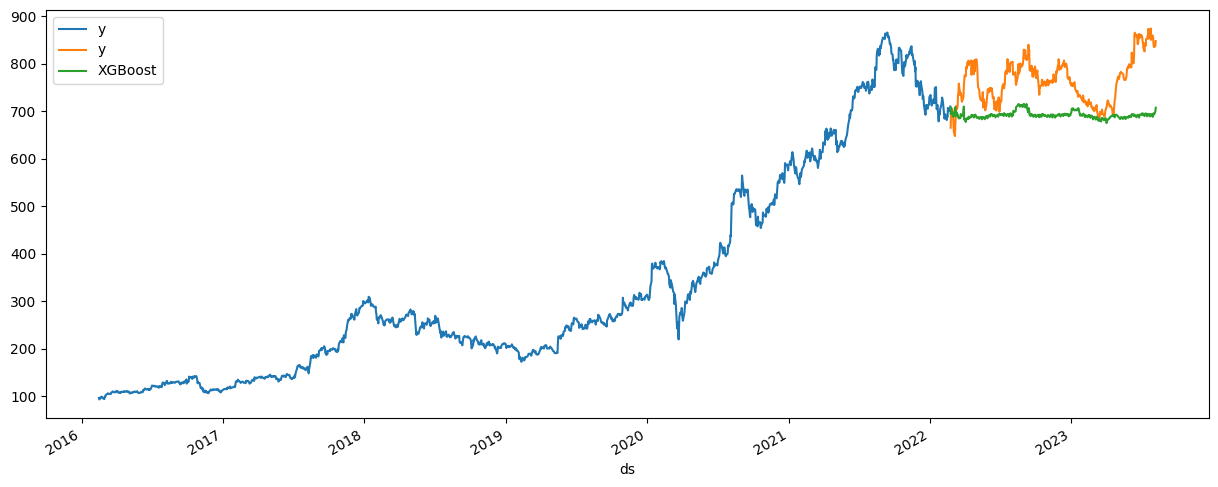

In [24]:
training_set[4000:].y.plot(figsize = (15,6), legend = True)
test_set.y.plot(figsize = (15,6), legend = True)

#test_set.y.plot(legend = True)
predictions.plot(legend = True)

In [34]:
result_test = []
result_pred = []
from sklearn.metrics import accuracy_score

days_next = 21
for x in range(len(test_set.y)-days_next):
    if x % days_next == 0:
        #print(x)

        if test_set.y.iloc[x+days_next] > test_set.y.iloc[x]:
            result_test.append(1)
        else:
            result_test.append(0)
        
        if predictions.iloc[x+days_next] > predictions.iloc[x]:
            result_pred.append(1)
        else:
            result_pred.append(0)
        
d = accuracy_score(result_pred,result_test)
print(d)

0.7058823529411765


In [26]:
#MAPE
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set.y, predictions)

9.342160627112401

<Figure size 1000x500 with 0 Axes>

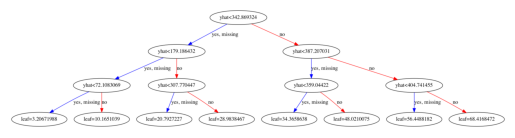

In [27]:
dir(model)
plt.figure(figsize=(10, 5))
xgb.plot_tree(model, num_trees=0, rankdir='TB')  # Change rankdir to 'TB' for top-to-bottom view
plt.show()

#Future

